# 2. Vectors

## playing with vectors in graphs

- 1. example drawing created via list of vectors
- 2. example drawing of vector specific length and specifc x and y coordinates => length = sqrt(x^2 + y^2) 
- 3. dalparabool met vector lijst

In [3]:
from draw import draw
from shapes import *
from constants import colors
from random import randint
from math import *
from utils import vectors

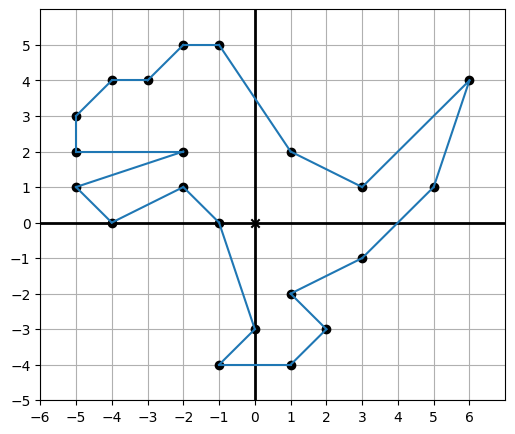

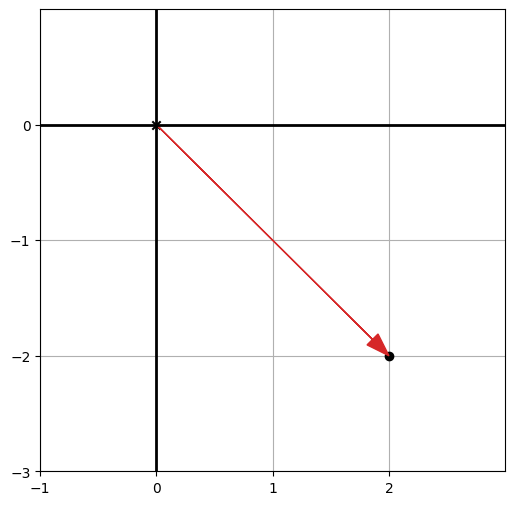

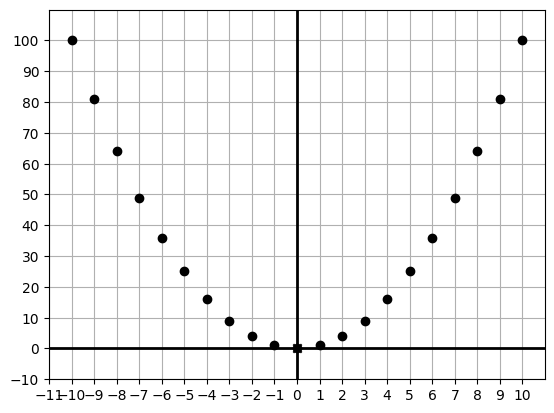

In [2]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
)

draw(
    Points(*[(2, -2)]),
    Arrow(*[(2,-2),(0,0)])
)

draw(
    Points(*[[x, x**2] for x in range(-10, 11)]),
    grid=(1,10),
    nice_aspect_ratio=False
)

## vector arithmetic

- 1. pythagorean theorem => calculates the length of a vector addition based upon x and y movements
- 2. scalar multiplication => multiplying a vector by a number (each component will be scaled by the same number)
  - scalar => ordinary number when working with vectors
  - we draw the dino on a certain scale as illustration
- 3. subtraction => vector subtraction tells us to go to x units to left | right and y units up | down to go from (a - b) b to a 
  - any v will have a -v with equal length but opposite direction 
- 4. exercices
- 5. setup angles and trigonometry => length of vector and distance between vectors does not fullfil or needs we need direction 

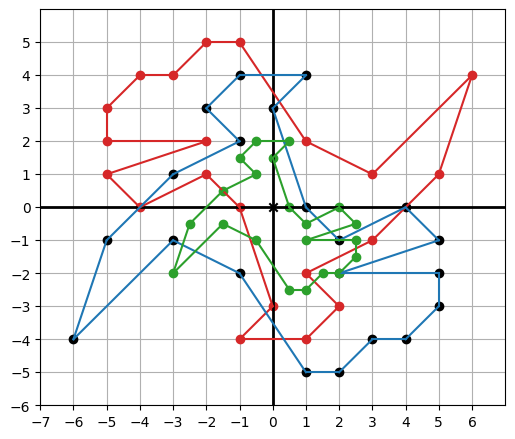

In [3]:
dino_vectors2 = [vectors.add((-1.5,-2.5), v) for v in dino_vectors]

arrows = [Segment(tip,tail,color=black) for (tip,tail) in
         zip(dino_vectors2, dino_vectors)]


vectors.length((4, 3)) # 5 (16+9 => sqrt(25))
dino_vectors3 = [vectors.scale(-1, v) for v in dino_vectors]
## scale 1 means opposite direction and same length

dino_vectors4 = [vectors.scale(-0.5, v) for v in dino_vectors]
## scale 1 means opposite direction and half the length length

# arrows = [Segment(tip,tail,color=black) for (tip,tail) in
#          zip(dino_vectors2, dino_vectors)]

draw(
    Points(*dino_vectors, color=red),
    Polygon(*dino_vectors, color=red),
    Points(*dino_vectors3),
    Polygon(*dino_vectors3),
    Points(*dino_vectors4, color=colors.orange),
    Polygon(*dino_vectors4, color=colors.orange)
    # *arrows
)

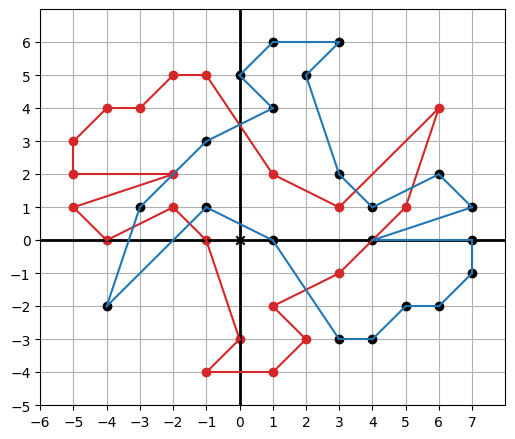

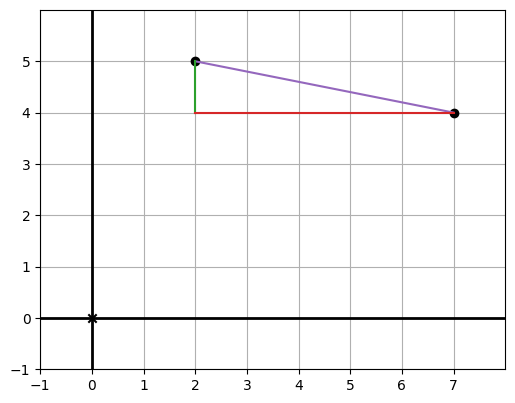

move 5 units on x! move -1 units on y!
5 is red! -1 is green!
the total distance between the points will be 5.0990195135927845!


In [4]:
dino_vectors4 = [vectors.subtract((2,2), v) for v in dino_vectors]

# arrows = [Segment(tip,tail,color=black) for (tip,tail) in
#          zip(dino_vectors2, dino_vectors)]

draw(
    Points(*dino_vectors, color=red),
    Polygon(*dino_vectors, color=red),
    Points(*dino_vectors4),
    Polygon(*dino_vectors4),
    # *arrows
)

pointA = (7, 4)
pointB = (2, 5)
directionFromBToA = vectors.subtract(pointA, pointB)
intermediateYCoord = pointB[1] + directionFromBToA[1]
intermediateCoords = (pointB[0], intermediateYCoord)
draw(
    Points(pointA, pointB),
    Segment(pointA, pointB, color=colors.purple),
    Segment(pointB, intermediateCoords, color=colors.green),
    Segment(intermediateCoords, (pointB[0] + directionFromBToA[0], intermediateYCoord), color=colors.red),
)

print(f'move {directionFromBToA[0]} units on x! move {directionFromBToA[1]} units on y!')
print(f'{directionFromBToA[0]} is red! {directionFromBToA[1]} is green!')
print(f'the total distance between the points will be {vectors.length(directionFromBToA)}!')

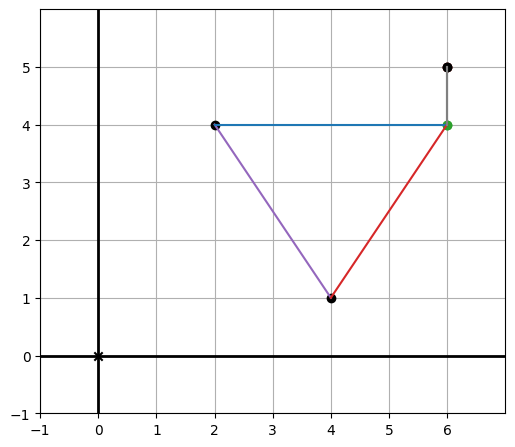

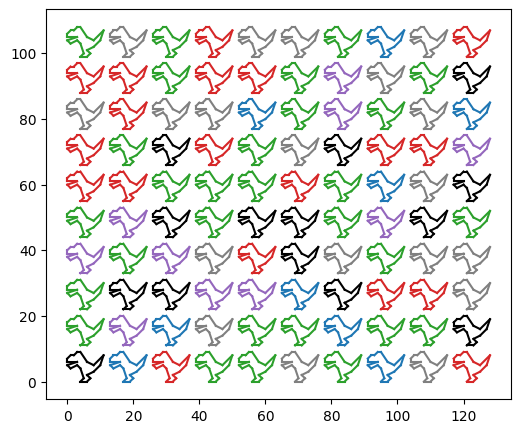

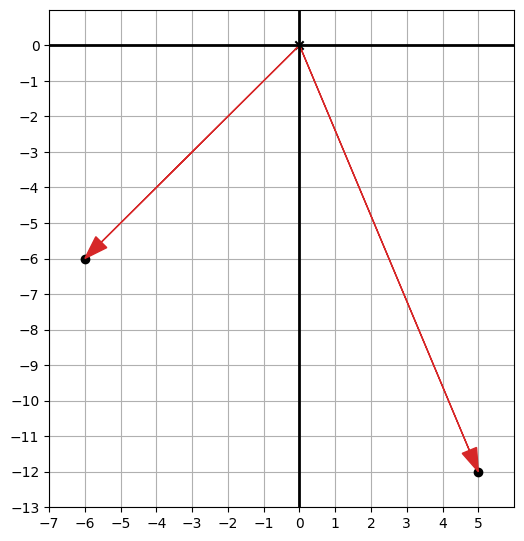

5.916079783099616


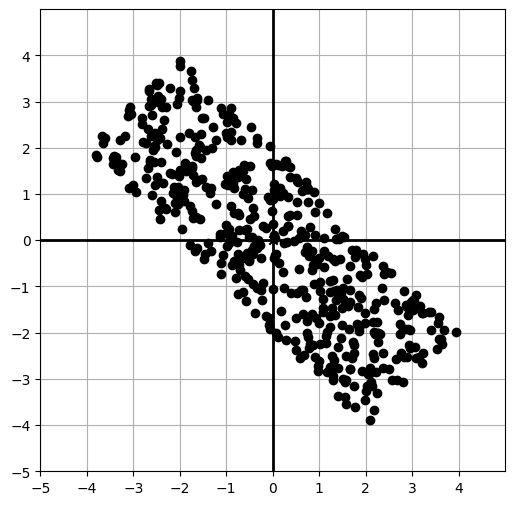

(13, 7)


In [5]:
# Exercise 2.7: You can add any number of vectors together by summing all of their x-coordinates and all of their ycoordinates. For instance, the fourfold sum (1, 2) + (2, 4) + (3, 6) + (4, 8) has x component 1 + 2 + 3 + 4 = 10 and y
# component 2 + 4 + 6 + 8 = 20, making the result (10, 20). Implement a revised add function that takes any number of
# vectors as arguments

def addition(*vecs):
    sumY=0
    sumX=0
    for vec in vecs:
        sumX += vec[0]
        sumY += vec[1]
    print(sumX, sumY)

def additionClean(*vecs):
    return [sum(xOryGroup) for xOryGroup in zip(*vecs)] # zip x and y together in tuple put them in list


# Exercise 2.8: Write a function translate(translation, vectors) that takes a translation vector a
# input vectors, and returns a list of the input vectors all translated by the translation vector. For instance,
# translate((1,1), [(0,0), (0,1,), (-3,-3)]) should return [(1,1),(1,2),(-2,-2)]

def translate(trans, vecs):
    return [(vec[0] + trans[0], vec[1] + trans[1]) for vec in vecs]

translate((1,1), [(0,0), (0,1,), (-3,-3)])


# Mini-project 2.9: Any sum of vectors v + w gives the same result as w + v. Explain why this is true using the definition of
# the vector sum on coordinates. Also, draw a picture to show why it is true geometrically.
# Solution: If you add two vectors u = (a, b) and v = (c, d), the coordinates a, b, c, and d are all real numbers. The result of
# the vector addition is u + v = (a + b, c + d). The result of v + u is (b + a, d + c), which is the same pair of coordinates
# because order doesn’t matter when adding real numbers. Tip-to-tail addition in either order yields the same sum vector.
# Visually, we can see this by adding an example pair of vectors tip-to-tail:

pointA = (2, 4)
pointB = (4, 1)
endPoint = vectors.add(pointA, pointB)
aplusbIntermedediateX = pointA[0] + pointB[0]
aplusbIntermedediate = (aplusbIntermedediateX, pointA[1])
aplusbEndpoint = (aplusbIntermedediate[0], pointA[1] + pointB[1])

bplusaIntermedediateX = pointB[0] + pointA[0] 
bplusaIntermedediate = (bplusaIntermedediateX, pointA[1])
bplusaEndpoint = (aplusbIntermedediate[0], pointA[1] + pointB[1])
# directionFromBToA = 
# intermediateYCoord = pointB[1] + directionFromBToA[1]
# intermediateCoords = (pointB[0], intermediateYCoord)
draw(
    Points(pointA, pointB),
    Segment(pointA, pointB, color=colors.purple),
    Points(endPoint, color=colors.red),

    Points(aplusbIntermedediate, color=colors.green),
    Segment(pointA, aplusbIntermedediate, color=colors.blue),

    Points(aplusbEndpoint, color=colors.black),
    Segment(aplusbIntermedediate, aplusbEndpoint, color=colors.gray),

    Points(bplusaIntermedediate, color=colors.green),
    Segment(pointB, aplusbIntermedediate, color=colors.red),

    Points(bplusaEndpoint, color=colors.black),
    Segment(bplusaIntermedediate, bplusaEndpoint, color=colors.gray),
)



# Mini-project 2.11: Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies
# of the dinosaur. This shows the power of computer graphics: imagine how tedious it would be to specify all 2,100
# coordinate pairs by hand!

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]
color_options = [
    blue,
    black,
    red,
    colors.green,
    colors.purple,
    colors.orange,
    colors.gray
] 



def drawDinosours(amount, scale = 1, columns = 10, rows = 10):
    def color_picker():
        return color_options[randint(0, len(color_options) - 1)]
    [xVals, yVals] = zip(*dino_vectors)
    maxX = max(xVals)
    maxY = max(yVals)
    minX = min(xVals)
    minY = min(yVals)
    padding = 2
    width = abs(minX - maxX) + padding
    height = abs(minY - maxY) + padding
    offSetToZeroX = abs(minX) if minX < 5 else 0
    offSetToZeroY = abs(minY) if minY < 5 else 0
    offsetToZero = (offSetToZeroX, offSetToZeroY)
    

    scaled_dino_vectors = [vectors.scale(scale, vectors.add(vec, offsetToZero)) for vec in dino_vectors]
    list_of_dinos = []
    yOffset = 0
    xOffset = 0
    for row in range(rows):
            yOffset = row * height
            for col in range(columns):
                xOffset = col * width
                list_of_dinos.append([(x + xOffset, y + yOffset) for (x,y) in scaled_dino_vectors])
    draw(
        *[ Polygon(*dino, color=color_picker()) for dino in list_of_dinos ],
        axes=False,
        origin=False,
        grid=None
    )
drawDinosours(0.5, 1, 10, 10)


# Exercise 2.13: What are the components and lengths of the vectors (-6, -6) and (5, -12)?
# Solution: The components of (-6, -6) are (-6, 0) and (0, -6), both having length 6. The length of (-6, -6) is the square root
# of 62 + 62, which is approximately 8.485.
# The components of (5, -12) are (5, 0) and (0, -12), having lengths of 5 and 12, respectively. The length of (5, -12) is
# given by the square root of 52 + 122 = 25 + 144 = 169. The result of the square root is exactly 13.
pointA = (-6, -6)
pointB = (5, -12)
draw(
    Points(*[pointA]),
    Arrow(*[pointA,(0,0)]),
    Points(*[pointB]),
    Arrow(*[pointB,(0,0)])
)


# Exercise 2.14: which of the dino vectors is the longest ?
max(dino_vectors, key=vectors.length)


# Exercise 2.14: Suppose I have a vector v that has a length of 6 and an x component (1, 0). What are the possible
# Solution: The x component of (1, 0) has length 1 and the total length is 6, so the length b of the y component must
# satisfy the equation 12 + b2 = 62, or 1 + b2 = 36. Then b2 = 35 and the length of the y component is approximately
# 5.916. This doesn’t tell us the direction of the y component, however. The vector v could either be (1, 5.916) or (1, -
# 5.916)


length = 6
v = (1, 0)

# x^2+y^2=z^2
# pow(1) + pow(y) = pow(length)

y = sqrt(pow(length, 2) - pow(1, 2))
print(y)

# coordinates (1, 5.916)


# Mini-project 2.18: Convince yourself algebraically that scaling the coordinates by a factor also scales the length of the
# vector by the same factor. Suppose a vector of length c has the coordinates (a, b). Show that for any non-negative real
# number s, the length of (s ∙ a, s ∙ b) is s ∙ c. (This can’t work for a negative value of s because a vector can’t have a
# negative length.)

"""
c^2 = a^2 + b^2
(c*s)^2  = ((as)^2 + (bs)^2) # distributiviteit
c*s = sqrt(a^2s^2 + b^2s^2) # power of product
c*s = sqrt(s^2(a^2 + b^2)) # distributiviteit
c*s = s*sqrt((a^2 + b^2)) # power of product
c*s = s*c # sqrt((a^2 + b^2)) = c
"""


# parallelogram with vertices at (-2, 4), (-4, 2), (2, -4), and (4, -2). We can test many random, allowable values of r and s to
# validate this:
from random import uniform
u = (-1,1)
v = (1,1)
def random_r():
    return uniform(-3,3)

def random_s():
    return uniform(-1,1)

possibilities = [vectors.add(vectors.scale(random_r(), u), vectors.scale(random_s(), v)) for i in range(0,500)]


draw(Points(*possibilities))

'''
Exercise 2.20: Show algebraically why a vector and its opposite have the same length? (Hint: plug the coordinates and
their opposites into the Pythagorean theorem.)

c^2 = a^2 + b^2
c = sqrt(-a^2 + -b^2)
c = sqrt(-a*-a + -b*-b*) = sqrt(a^2 + b^2)

Exercise 2.22: Suppose u is any 2D vector. What are the coordinates of u + -u?
Solution: A 2D vector u has some coordinates (a, b). Its opposite has coordinates (-a, -b), so:
u + (-u) = (a, b) + (-a, -b) = (a − a, b − b) = (0, 0)

Exercise 2.23: For vectors u = (-2, 0), v = (1.5, 1.5), and w = (4, 1), what are the results of the vector subtractions v − w,
u − v, and w − v?

v − w = (-2.5, 0.5)
u − v = (-3.5, -1.5)
w − v = (2.5, -0.5)
'''

"""
Exercise 2.24: Write a Python function subtract(v1,v2) that returns the result of v1 − v2, taking two 2D vectors
as inputs and returning a 2D vector as an output
"""
def subtract(v1, v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

"""
Exercise 2.25: Write a Python function distance(v1,v2) that returns the distance between two input vectors. (Note
that the subtract function from the previous exercise already gives the displacement.)
Write another Python function perimeter(vectors) that takes a list of vectors as an argument and returns the su
of distances from each vector to the next, including the distance from the last vector to the first. What is the perimeter
of the dinosaur defined by dino_vectors?
"""
def distance(v1, v2):
    v = subtract(v1, v2) # vector subtraction tells us to go to x units to left | right and y units up | down to go from (a - b) b to a   
    return vectors.length(v)

def perimeter(vcs):    
    distances = [distance(vcs[i], vcs[i + 1]) for i in range(0, len(vcs) - 1)]
    distances.append(distance(vcs[0], vcs[-1]))
    # clean version
    # distances = [distance(vectors[i], vectors[(i+1)%len(vectors)]) for i in range(0,len(vectors))]
    return sum(distances)
        

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

perimeter([(1,0),(1,1),(0,1),(0,0)])
perimeter(dino_vectors)


""" 
Mini-project 2.26: Let u be the vector (1, 2). Suppose there is another vector v with positive integer coordinates (n, m)
such that n > m and has a distance of 13 from u. What is the displacement from u to v? (Hint: you can use Python to
search for the vector v.) 
"""

u = (1,2)

# v = (n,m) # n > m

# (1-n, 2-m) = (displacement_x, displacement_y)

# 13^2 = displacement_x^2 + displacement_y^2

def length(v):
    return sqrt(v[0]**2 + v[1]**2)

def subtract(v1, v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

def distance(v1, v2):
    v = subtract(v1, v2) # vector subtraction tells us to go to x units to left | right and y units up | down to go from (a - b) b to a   
    return length(v)

for n in range(0,14):
    for m in range(0, 14):
        dist = distance((n,m), u)
        if dist == 13 and n > m > 0:
            print((n,m))

## Angles and trignometry in the plane

### introduction

<img src="https://www.storyofmathematics.com/wp-content/uploads/2021/05/direction-of-a-vector-fig-2.jpg"/>

- pollar coordinates (5, 37°)
- cartesian coordinates (4, 3)

=> dependign on the situation we will use one or the other
=> via trignometry we can coverse back and forth

<img src="https://res.cloudinary.com/dri8yyakb/image/upload/v1628839355/Annotation_2021-08-13_092041_uptoyc.png" width=300/>=

=> in this direction the y coordinates are -2 times their x coordinates
=> ratio y/x = -2 
=> ex. 45° gives a constant 1 ratio


<img src="https://www.mathsisfun.com/algebra/images/sin-cos-tan.svg"/>

- each point on an angle will have a constant y/x ratio
- the ratio can be expressed as the tan of an angle => tan(45°) = 1
- tangent is first step to converting polar to cartesian 
- tan = (vertical distance) / (horizontal distance)
 

 <img src="https://res.cloudinary.com/dri8yyakb/image/upload/v1628840272/Annotation_2021-08-13_0920d41_vsd6ru.png" width=300/>

For every 5 units you travel at 37°, you cover approximately 3 vertical units. Therefore, we can
write:

sin(37°) ≈ 3 / 5

Similarly, for every 5 units you travel at 37°, you cover approximately 4 horizontal units, so we
can write:

cos(37°) ≈ 4 / 5

This is a general strategy for converting a vector in polar coordinates to corresponding Cartesian
coordinates. If you know the sine and cosine of an angle θ (the Greek letter theta, commonly
used for angles) and a distance r traveled in that direction, the Cartesian coordinates are given
by `(r · cos(θ), r · sin(θ))` and shown in figure 2.31.


In [26]:
vec_polar = (5, 37)
vec_cartesian = (4, 3)

# sin = y/r => y = sin * r
# cos = x/r => x = cos * r

def radians(deg):
    return deg * pi / 180

def degrees(rad):
    return rad * 180 / pi

def to_cartesian(v, inRadians = True):
    (length, degrees) = v
    return (length * cos(degrees), length * sin(degrees)) if inRadians else (length * cos(radians(degrees)), length * sin(radians(degrees)))

print(to_cartesian(vec_polar, False))

def polar_to_cartesian(v):
    (length, degrees) = v
    return (length * cos(radians(degrees)), length * sin(radians(degrees)))

print(polar_to_cartesian(vec_polar))

(3.993177550236464, 3.0090751157602416)
(3.993177550236464, 3.0090751157602416)


### radians

<img src="https://www.mathsisfun.com/numbers/images/pi.svg"/>
<img src="https://www.pylenin.com/img/python-examples/radian.png"/>



### from component to angle

ex: 

- v = (-2,3) => ratio (-3/2) & length = sqrt(13)
- tan(angle) = ratio
- sin(angle) = 3/sqrt(13)
- cos(angle) = 2/sqrt(13)


=> arcsin  inverse sin

In [9]:
print(pi/4, sin(pi/4), asin(0.7071067811865475))

0.7853981633974483 0.7071067811865475 0.7853981633974482


In [4]:

from decimal import *

vector = (-2, 3)
hypothenus = vectors.length(vector)
sin_value = vector[1]/hypothenus
cos_value = vector[0]/hypothenus
angle_via_sin = asin(sin_value) # unsatisfactory for finding angle because multiple angles can have an equal sin
angle_via_cos = acos(cos_value) # unsatisfactory for finding angle because multiple angles can have an equal cos

# you have to check which angle works for both
print(angle_via_sin, round(sin(angle_via_sin), 2) == round(sin_value, 2) and round(cos(angle_via_sin), 2) == round(cos_value, 2))
print(angle_via_cos, round(sin(angle_via_cos), 2) == round(sin_value, 2) and round(cos(angle_via_cos), 2) == round(cos_value, 2))


# easier atan2 in reverse order
print(atan2(3,-2))

0.9827937232473292 False
2.1587989303424644 True
2.158798930342464


In [ ]:
def to_cartesian(v, inRadians = True):
    (length, degrees) = v
    return (length * cos(degrees), length * sin(degrees)) if inRadians else (length * cos(radians(degrees)), length * sin(radians(degrees)))

def to_polar(vector, inRadians = True):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle if inRadians else degrees(angle))

2.9963310898497184
(-4.879, 6.961499999999999)


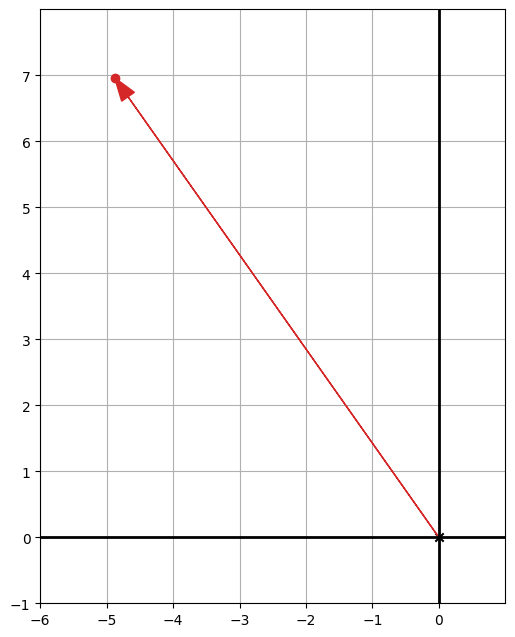

[0] vertical unit covered per length covered =>  0.0 vertical unit covered per length covered =>  1.0
[90] vertical unit covered per length covered =>  1.0 vertical unit covered per length covered =>  6.123233995736766e-17
[180] vertical unit covered per length covered =>  1.2246467991473532e-16 vertical unit covered per length covered =>  -1.0
0.9999999999999999 <- satisfies pythagorean theorem
y - 0.49999999999999994 , x - 0.8660254037844387 , ratio - 0.5773502691896257


In [16]:
# Exercise 2.27: Confirm that the vector given by Cartesian coordinates (-1.34, 2.68) has a length of approximately 3 as
# expected.
v = (-1.34, 2.68)
print(vectors.length(v))

# Exercise 2.28: The figure shows a line that makes a 22° angle in the counterclockwise direction from the positive xaxis. Based on the following picture, what is the approximate value of tan(22°)?
# Solution: graph shows intersection in 10,  4 => we can assume a ratio of 4/10 = 0.4 (tan(angle))

# Exercise 2.29: Suppose I travel 8.5 units from the origin at an angle of 125°, measured counterclockwise from the
# positive x-axis. Given that sin(125°) = 0.819 and cos(125°) = -0.574, what are my final coordinates? Draw a picture to
# show the angle and path traveled.
solution= (8.5 * -0.574, 8.5 * 0.819)
print(solution)
draw(
    Points(*[solution], color=red),
    Arrow(*[solution,(0,0)])
)

# Exercise 2.30: What are the sine and cosine of 0°? Of 90°? Of 180°? In other words, how many vertical and horizontal
# units are covered per unit distance in any of these directions?
[print(f'[{deg}]', 'vertical unit covered per length covered => ',sin(radians(deg)), 'vertical unit covered per length covered => ', cos(radians(deg))) for deg in [0, 90, 180]]

# Exercise 2.31: First, confirm that these lengths are valid for a right triangle because they satisfy the Pythagorean theorem. Then,
# calculate the values of sin(30°), cos(30°), and tan(30°) to three decimal places using the measurements in the
# diagram.
print(f'{((sqrt(3)/2)**2 + (1/2)**2)} <- satisfies pythagorean theorem')
y = 1 * sin(radians(30))
x = 1 * cos(radians(30))
ratio = tan(radians(30))
print(f'y - {y} , x - {x} , ratio - {ratio}')

# Exercise 2.32: Looking at the triangle from the previous exercise from a different perspective, use it to calculate the
# values of sin(60°), cos(60°), and tan(60°) to three decimal places.